In [1]:
%matplotlib inline
import sys
from astropy import table
import numpy as np
from pathlib import Path
from matplotlib import colors, cm
import cmocean
import betterplotlib as bpl

bpl.set_style()

Matplotlib is building the font cache; this may take a moment.


In [2]:
home_dir = Path("../").resolve()
data_dir = home_dir / "data"

In [3]:
sys.path.append(str(home_dir / "pipeline"))
import utils

In [4]:
catalogs = []
for galaxy_dir in data_dir.iterdir():
    cat_name = galaxy_dir / "size" / "final_catalog_final_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
    final_cat = table.Table.read(str(cat_name), format="ascii.ecsv")
    catalogs.append(final_cat)
    
big_catalog = table.vstack(catalogs, join_type="inner")

In [5]:
mask_1313e = big_catalog["galaxy"] == "ngc1313-e"
mask_1313w = big_catalog["galaxy"] == "ngc1313-w"
mask_1313 = np.logical_or(mask_1313e, mask_1313w)

mask_628c = big_catalog["galaxy"] == "ngc628-c"
mask_628e = big_catalog["galaxy"] == "ngc628-e"
mask_628 = np.logical_or(mask_628c, mask_628e)

# Now examine the clusters in the galaxy

In [6]:
image_1313e = utils.get_drc_image(data_dir / "ngc1313-e")[0]
image_1313w = utils.get_drc_image(data_dir / "ngc1313-w")[0]
image_628e = utils.get_drc_image(data_dir / "ngc628-e")[0]
image_628c = utils.get_drc_image(data_dir / "ngc628-c")[0]

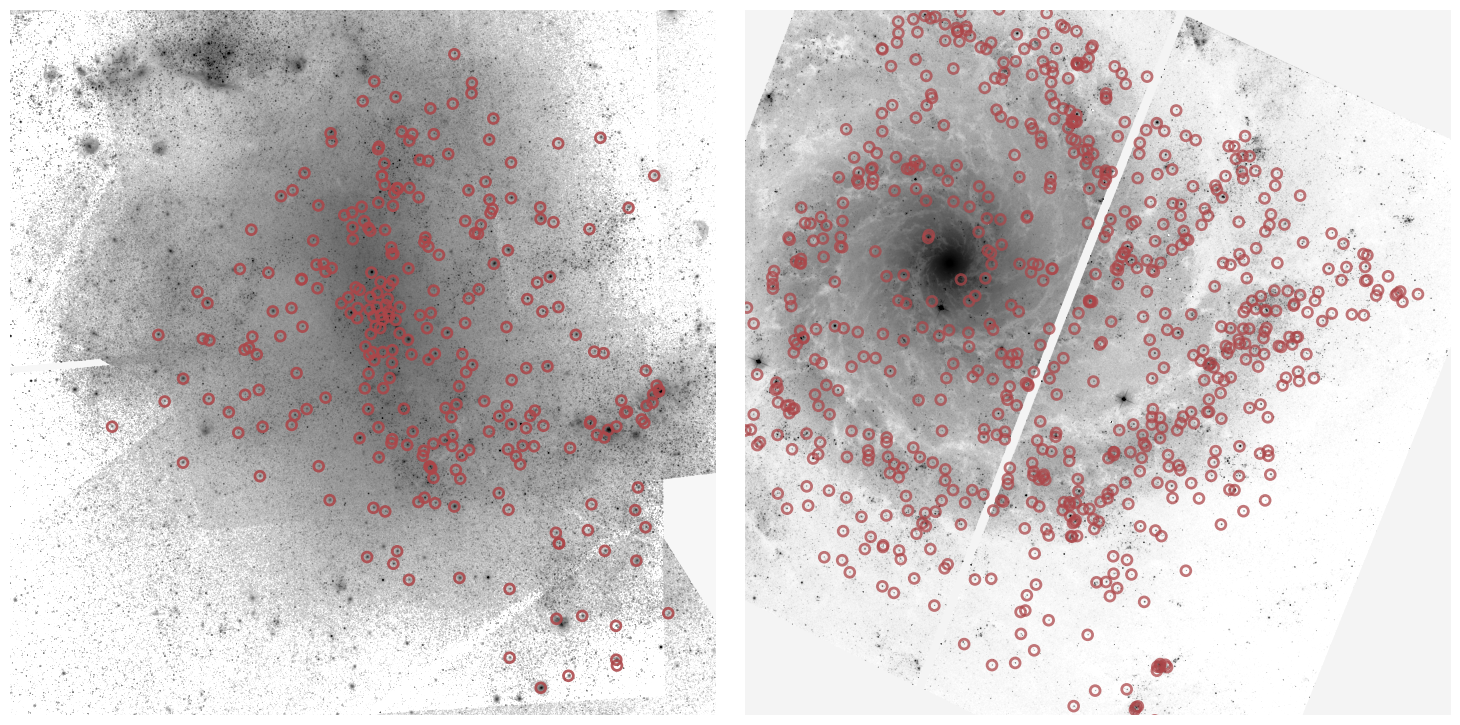

In [7]:
fig, axs = bpl.subplots(figsize=[15, 8], ncols=2, nrows=1)
axs = axs.flatten()

for ax, im, mask, vmax in zip(axs,
                             [image_1313w, image_628c],
                             [mask_1313w, mask_628c],
                             [2e4, 1e3]):
    
    norm = colors.SymLogNorm(linthresh=10, linscale=0.2, vmin=-10, vmax=vmax, base=10)

    ax.imshow(im, norm=norm, cmap="Greys")
    
    ax.scatter(big_catalog["x"][mask], big_catalog["y"][mask], 
               c="none", facecolors="none", edgecolors=bpl.color_cycle[3], 
               s=50, lw=2)
    
    ax.axis("off")


axs[0].set_limits(0, 5000, 1000, 6000)
axs[1].set_limits(1000, 6000, 1000, 6000)


fig.savefig("ngc628_ngc1313.png", dpi=300)